In [2]:
import pandas_datareader as pdr
import pandas as pd

In [3]:
print(pd.__version__)
print(pdr.__version__)

2.2.3
0.10.0


#we will collect the apple stock datatset 
#preprocess the data train and test
#creat an stacked lstm
#predict the test data and plot the optput
#predict the future 30 days and plot the outpot

In [4]:
import yfinance as yf

In [5]:
df=yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [78]:
df=pdr.get_data_tiingo("AAPL",api_key="33a9fda33040273c31164748ff4ce61430633282")

TypeError: concat() takes 1 positional argument but 2 were given

In [16]:
f=pdr.get_data_tiingo("goog",api_key="33a9fda33040273c31164748ff4ce61430633282")

C:\Users\heman\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [17]:
f

close     high        low      open  \
symbol date                                                               
goog   2018-12-03 00:00:00+00:00  1106.43  1124.65  1103.6650  1123.140   
       2018-12-04 00:00:00+00:00  1050.82  1104.42  1049.9800  1103.120   
       2018-12-06 00:00:00+00:00  1068.73  1071.20  1030.7700  1034.260   
       2018-12-07 00:00:00+00:00  1036.58  1075.26  1028.5000  1060.010   
       2018-12-10 00:00:00+00:00  1039.55  1048.45  1023.2900  1035.050   
...                                   ...      ...        ...       ...   
       2023-11-27 00:00:00+00:00   138.05   139.63   137.5400   137.570   
       2023-11-28 00:00:00+00:00   138.62   138.66   137.0400   137.630   
       2023-11-29 00:00:00+00:00   136.40   139.67   136.2950   138.985   
       2023-11-30 00:00:00+00:00   133.92   136.96   132.7900   136.400   
       2023-12-01 00:00:00+00:00   133.32   133.50   132.1517   133.320   

                                    volume  adjClose   adjHigh     adjLow  \
symbol date                                                                 
goog   2018-12-03 00:00:00+00:00   1990758   55.3215   56.2325   55.18325   
       2018-12-04 00:00:00+00:00   2345166   52.5410   55.2210   52.49900   
       2018-12-06 00:00:00+00:00   2769225   53.4365   53.5600   51.53850   
       2018-12-07 00:00:00+00:00   2101206   51.8290   53.7630   51.42500   
       2018-12-10 00:00:00+00:00   1807725   51.9775   52.4225   51.16450   
...                                    ...       ...       ...        ...   
       2023-11-27 00:00:00+00:00  17886389  138.0500  139.6300  137.54000   
       2023-11-28 00:00:00+00:00  17046868  138.6200  138.6600  137.04000   
       2023-11-29 00:00:00+00:00  21014715  136.4000  139.6700  136.29500   
       2023-11-30 00:00:00+00:00  29913531  133.9200  136.9600  132.79000   
       2023-12-01 00:00:00+00:00  24267987  133.3200  133.5000  132.15170   

                                   adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                  
goog   2018-12-03 00:00:00+00:00   56.1570   39815160      0.0          1.0  
       2018-12-04 00:00:00+00:00   55.1560   46903320      0.0          1.0  
       2018-12-06 00:00:00+00:00   51.7130   55384500      0.0          1.0  
       2018-12-07 00:00:00+00:00   53.0005   42024120      0.0          1.0  
       2018-12-10 00:00:00+00:00   51.7525   36154500      0.0          1.0  
...                                    ...        ...      ...          ...  
       2023-11-27 00:00:00+00:00  137.5700   17886389      0.0          1.0  
       2023-11-28 00:00:00+00:00  137.6300   17046868      0.0          1.0  
       2023-11-29 00:00:00+00:00  138.9850   21014715      0.0          1.0  
       2023-11-30 00:00:00+00:00  136.4000   29913531      0.0          1.0  
       2023-12-01 00:00:00+00:00  133.3200   24267987      0.0          1.0  

[1258 rows x 12 columns]

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [7]:
import pandas as pd

In [8]:
df.to_csv("AAPL.CSV")

In [9]:
df1=pd.read_csv("AAPL.CSV")

In [10]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
...,...,...,...,...,...,...,...
11035,2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000
11036,2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
11037,2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
11038,2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700


In [11]:
df2=df.reset_index()["Close"]

In [12]:
df2.shape

(11040,)

In [13]:
df1[1228:]

,Date,Open,High,Low,Close,Adj Close,Volume
1228,1985-10-22,0.080357,0.081473,0.080357,0.080357,0.061947,424547200
1229,1985-10-23,0.080357,0.082589,0.080357,0.080357,0.061947,148377600
1230,1985-10-24,0.082031,0.084263,0.082031,0.082031,0.063238,272630400
1231,1985-10-25,0.082031,0.082031,0.080357,0.080357,0.061947,63280000
1232,1985-10-28,0.080357,0.080915,0.080357,0.080357,0.061947,59472000
...,...,...,...,...,...,...,...
11035,2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000
11036,2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
11037,2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
11038,2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

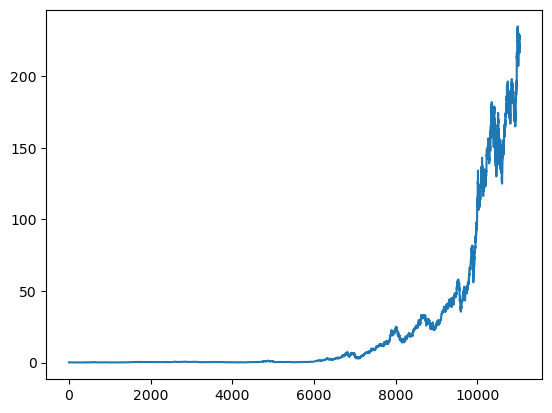

In [15]:
plt.plot(df2)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11040 non-null  object 
 1   Open       11040 non-null  float64
 2   High       11040 non-null  float64
 3   Low        11040 non-null  float64
 4   Close      11040 non-null  float64
 5   Adj Close  11040 non-null  float64
 6   Volume     11040 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 603.9+ KB


In [17]:
df2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11040 entries, 0 to 11039
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
11040 non-null  float64
dtypes: float64(1)
memory usage: 86.4 KB


In [18]:
import numpy as np

lstm is very sensitive to the scale of data thats why apply minmax scaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler(feature_range=(0,1))

In [20]:
df2=np.array(df2)
df2

array([1.28347993e-01, 1.21652000e-01, 1.12723000e-01, ...,
       2.26369995e+02, 2.27520004e+02, 2.27789993e+02])

In [21]:
df2=df2.reshape(-1,1)

In [22]:
df2.shape

(11040, 1)

In [23]:
df2

array([[1.28347993e-01],
       [1.21652000e-01],
       [1.12723000e-01],
       ...,
       [2.26369995e+02],
       [2.27520004e+02],
       [2.27789993e+02]])

In [24]:
df2[0]

array([0.12834799])

In [25]:
df2=mn.fit_transform(df2)

In [26]:
df2

array([[3.37524764e-04],
       [3.09003370e-04],
       [2.70970551e-04],
       ...,
       [9.64007412e-01],
       [9.68905844e-01],
       [9.70055854e-01]])

In [27]:
df2.shape

(11040, 1)

In [28]:
training_size=int(len(df2)*0.65)

In [29]:
test_size=len(df2)-training_size

In [30]:
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [31]:
train_data

array([[0.00033752],
       [0.000309  ],
       [0.00027097],
       ...,
       [0.01917903],
       [0.01893868],
       [0.01868159]])

In [32]:
test_data

array([[0.01842602],
       [0.0196856 ],
       [0.02003093],
       ...,
       [0.96400741],
       [0.96890584],
       [0.97005585]])

In [33]:
import numpy
def create_dataset(dataset,time_step=1):
    data_x,data_y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [34]:
training_size,test_size

(7176, 3864)

In [47]:
time_stamp=100
x_train, y_train=create_dataset(train_data,time_stamp)
x_test, y_test=create_dataset(test_data,time_stamp)

In [48]:
print(x_train)

[[0.00033752 0.000309   0.00027097 ... 0.00032802 0.00032564 0.00031138]
 [0.000309   0.00027097 0.00028285 ... 0.00032564 0.00031138 0.00031851]
 [0.00027097 0.00028285 0.00029712 ... 0.00031138 0.00031851 0.00032326]
 ...
 [0.01283394 0.0129313  0.01272745 ... 0.01796813 0.01849447 0.01841385]
 [0.0129313  0.01272745 0.01284459 ... 0.01849447 0.01841385 0.01905733]
 [0.01272745 0.01284459 0.01296629 ... 0.01841385 0.01905733 0.01917903]]


In [49]:
print(x_test.shape),print(y_test.shape)

(3763, 100)
(3763,)


(None, None)

In [50]:
print(x_train.shape),print(y_train.shape)

(7075, 100)
(7075,)


(None, None)

before implementing any lstm we need to reshape our dataset in 3 dimension
why we are doing this with x_train and x_test because these two we are going to give as input to our lstm

In [51]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_train.shape[1],1)

In [52]:
x_train.shape

(7075, 100, 1)

In [53]:
# create stacked lstm model
import keras
from keras.models import  Sequential
from keras.layers import Dense,LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
111/111 [==============================] - 47s 336ms/step - loss: 1.4404e-05 - val_loss: 0.0089
Epoch 2/100
111/111 [==============================] - 34s 310ms/step - loss: 6.0199e-07 - val_loss: 0.0061
Epoch 3/100
111/111 [==============================] - 36s 323ms/step - loss: 7.1579e-07 - val_loss: 0.0073
Epoch 4/100
111/111 [==============================] - 36s 321ms/step - loss: 7.5370e-07 - val_loss: 0.0081
Epoch 5/100
111/111 [==============================] - 36s 323ms/step - loss: 5.5201e-07 - val_loss: 0.0060
Epoch 6/100
111/111 [==============================] - 35s 318ms/step - loss: 4.6159e-07 - val_loss: 0.0068
Epoch 7/100
111/111 [==============================] - 36s 327ms/step - loss: 4.5181e-07 - val_loss: 0.0063
Epoch 8/100
111/111 [==============================] - 35s 319ms/step - loss: 3.6998e-07 - val_loss: 0.0033
Epoch 9/100
111/111 [==============================] - 35s 319ms/step - loss: 4.7145e-07 - val_loss: 0.0034
Epoch 10/100
111/111 [======

In [57]:
import tensorflow as tf

In [58]:
tf.__version__

'2.13.0'

In [59]:
train_predict=model.predict(x_train)

222/222 [==============================] - 25s 82ms/step


In [60]:
test_predict=model.predict(x_test)

118/118 [==============================] - 9s 70ms/step


In [61]:
train_predict=mn.inverse_transform(train_predict)
test_predict=mn.inverse_transform(test_predict)

In [62]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.5845046346464176

In [63]:
math.sqrt(mean_squared_error(y_test,test_predict))

76.91609316703881

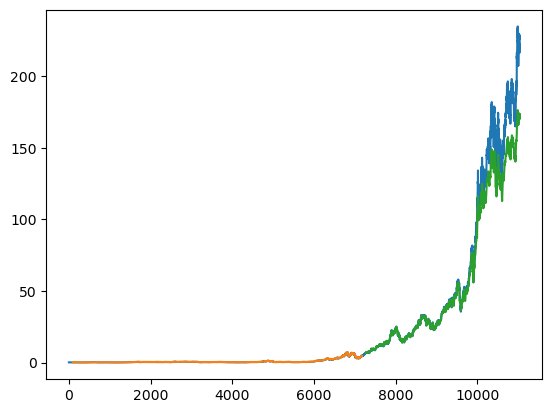

In [64]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(mn.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [65]:
len(test_data)

3864

In [66]:
x_input=test_data[3764:].reshape(1,-1)
x_input.shape

(1, 100)

In [67]:
temp_input=list(x_input)
temp_input

[array([0.77671844, 0.77816671, 0.78596155, 0.77948713, 0.79324521,
        0.79814357, 0.8078978 , 0.80840892, 0.8085367 , 0.81352027,
        0.81910023, 0.81292395, 0.79580092, 0.80900524, 0.80904788,
        0.81032567, 0.81458514, 0.81867426, 0.82625611, 0.82761918,
        0.83409353, 0.82817286, 0.83843821, 0.82237998, 0.88214036,
        0.90735649, 0.91234007, 0.90488599, 0.92269055, 0.91255299,
        0.89291682, 0.88358863, 0.88635726, 0.8903186 , 0.90812316,
        0.91174374, 0.89692073, 0.92303132, 0.93802467, 0.94347679,
        0.96387963, 0.9701837 , 0.97384678, 0.99216252, 0.96911883,
        0.9817694 , 0.99821096, 1.        , 0.97469873, 0.95467916,
        0.95523291, 0.95374214, 0.95821453, 0.93065574, 0.92618335,
        0.9281853 , 0.92937795, 0.93176325, 0.94573431, 0.92988907,
        0.93627828, 0.89117049, 0.88248113, 0.89351321, 0.90837872,
        0.92085901, 0.9263537 , 0.94228415, 0.9442009 , 0.95697931,
        0.96264442, 0.96196288, 0.96460374, 0.96

In [68]:

temp_input=temp_input[0].tolist()
temp_input

[0.7767184376113306,
 0.7781667073764952,
 0.7859615483407256,
 0.7794871331965859,
 0.7932452085078004,
 0.7981435749360817,
 0.8078978014682526,
 0.8084089172710284,
 0.8085366962217224,
 0.8135202702819262,
 0.8191002327712081,
 0.8129239468472278,
 0.7958009175104392,
 0.8090052407057269,
 0.809047877018878,
 0.8103256665258176,
 0.814585138200629,
 0.8186742596059751,
 0.826256113987589,
 0.827619176120831,
 0.834093526270591,
 0.8281728632423783,
 0.838438205577325,
 0.8223799791648595,
 0.8821403615629135,
 0.9073564910728513,
 0.9123400651330552,
 0.9048859897021352,
 0.9226905501055447,
 0.9125529867212919,
 0.892916819700636,
 0.883588631328078,
 0.8863572619189535,
 0.8903186043736057,
 0.9081231647770152,
 0.9117437416983567,
 0.8969207334740595,
 0.9230313156388551,
 0.9380246741326177,
 0.9434767926768259,
 0.9638796334016456,
 0.9701836982763199,
 0.9738467815220532,
 0.9921625227226183,
 0.969118830357617,
 0.9817694014369777,
 0.9982109647015249,
 1.0,
 0.9746987278525

In [69]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.74096394]
101
1 day input [0.77816671 0.78596155 0.77948713 0.79324521 0.79814357 0.8078978
 0.80840892 0.8085367  0.81352027 0.81910023 0.81292395 0.79580092
 0.80900524 0.80904788 0.81032567 0.81458514 0.81867426 0.82625611
 0.82761918 0.83409353 0.82817286 0.83843821 0.82237998 0.88214036
 0.90735649 0.91234007 0.90488599 0.92269055 0.91255299 0.89291682
 0.88358863 0.88635726 0.8903186  0.90812316 0.91174374 0.89692073
 0.92303132 0.93802467 0.94347679 0.96387963 0.9701837  0.97384678
 0.99216252 0.96911883 0.9817694  0.99821096 1.         0.97469873
 0.95467916 0.95523291 0.95374214 0.95821453 0.93065574 0.92618335
 0.9281853  0.92937795 0.93176325 0.94573431 0.92988907 0.93627828
 0.89117049 0.88248113 0.89351321 0.90837872 0.92085901 0.9263537
 0.94228415 0.9442009  0.95697931 0.96264442 0.96196288 0.96460374
 0.96413519 0.95617    0.96600937 0.96745757 0.97107815 0.96451859
 0.9785748  0.97520984 0.94867335 0.94049518 0.94701216 0.9403674
 0.94075073 0.93734314 0.94820481 0.

In [70]:
day_new=np.arange(1,101)
day_predict=np.arange(101,131)


In [71]:
import matplotlib.pyplot as plt

In [72]:
len(df2)

11040

In [73]:
11040-100

10940

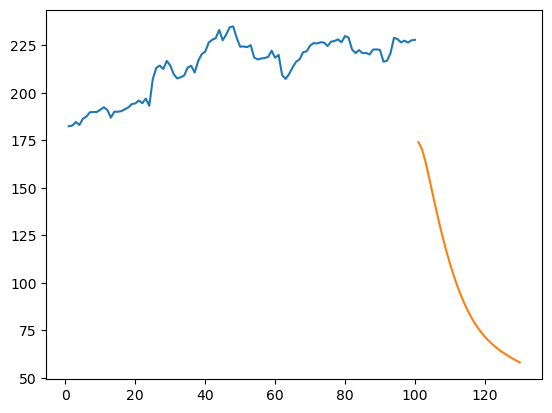

In [74]:
plt.plot(day_new,mn.inverse_transform(df2[10940:]))
plt.plot(day_predict,mn.inverse_transform(lst_output))

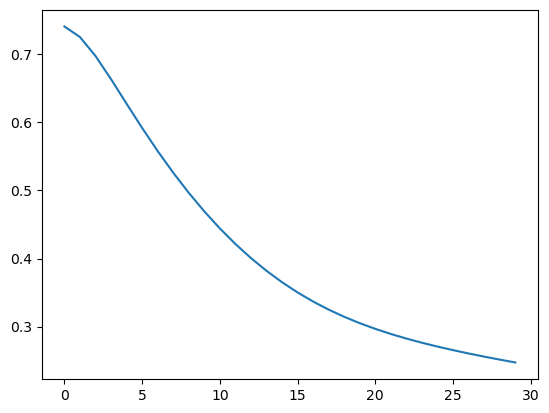

In [75]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[11040:])

In [76]:
df3=mn.inverse_transform(df3).tolist()

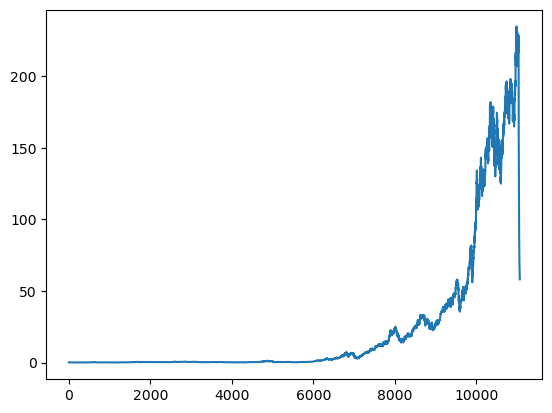

In [77]:
plt.plot(df3)